In [1]:
# Importation des bibliothèques
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
real_annotations_file = "/home/pionner01/Automatic-annotation-of-African-images/african_data_collector/storage/meta_images_final.csv" 
generated_annotations_file = "/home/pionner01/Automatic-annotation-of-African-images/annotation/storage/annotations_blip2.csv"  

real_annotations_df = pd.read_csv(real_annotations_file)
generated_annotations_df = pd.read_csv(generated_annotations_file)

merged_df = pd.merge(real_annotations_df, generated_annotations_df, left_on='filename', right_on='image_name', suffixes=('_real', '_generated'))

merged_df.head()

,filename,description,image_url,category,image_name,annotation
0,benin_0.jpg,"Une vue aérienne de porto-novo, la capitale du...",https://images.unsplash.com/photo-160024100505...,benin,benin_0.jpg,an aerial view of a city with many buildings
1,benin_1.jpg,two black paddle boats on seashore during daytime,https://images.unsplash.com/photo-1549631592-2...,benin,benin_1.jpg,two boats are sitting on the beach
2,benin_2.jpg,people in beach near body of water,https://images.unsplash.com/photo-1544622590-e...,benin,benin_2.jpg,a man standing on a wooden dock with umbrellas
3,benin_3.jpg,brown bridge on sunrise,https://images.unsplash.com/photo-144526251430...,benin,benin_3.jpg,a wooden pier with palm trees in the background
4,benin_4.jpg,The beauty of Africa : Peace.,https://images.unsplash.com/photo-157695021919...,benin,benin_4.jpg,a boy sitting on the back of a boat in the mid...


In [5]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

def calculate_similarity(row):

    real_embedding = model.encode(row['description'])
    generated_embedding = model.encode(row['annotation'])
    
    # Calculer le score de similarité
    similarity = cosine_similarity([real_embedding], [generated_embedding])[0][0]
    return similarity

merged_df['similarity_score'] = merged_df.apply(calculate_similarity, axis=1)

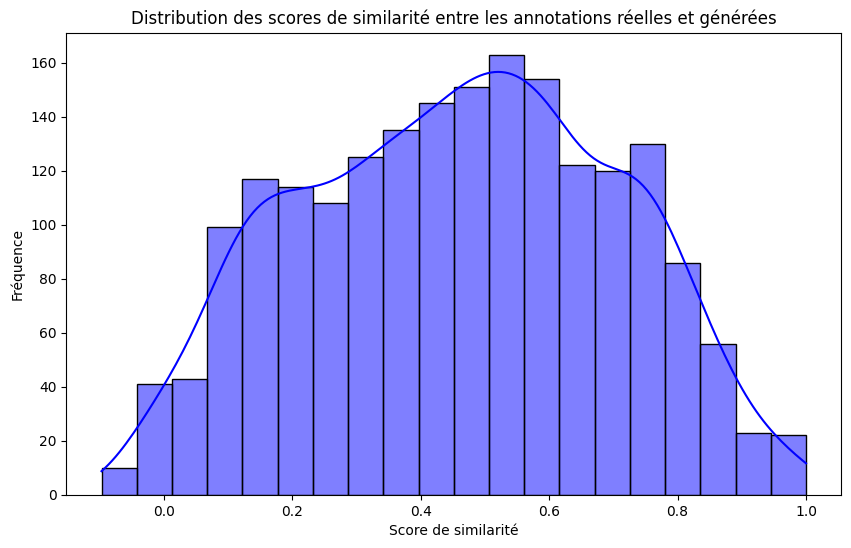

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['similarity_score'], kde=True, color='blue', bins=20)
plt.title('Distribution des scores de similarité entre les annotations réelles et générées')
plt.xlabel('Score de similarité')
plt.ylabel('Fréquence')
plt.show()

In [7]:
merged_df.head(20)  

,filename,description,image_url,category,image_name,annotation,similarity_score
0,benin_0.jpg,"Une vue aérienne de porto-novo, la capitale du...",https://images.unsplash.com/photo-160024100505...,benin,benin_0.jpg,an aerial view of a city with many buildings,0.213584
1,benin_1.jpg,two black paddle boats on seashore during daytime,https://images.unsplash.com/photo-1549631592-2...,benin,benin_1.jpg,two boats are sitting on the beach,0.718579
2,benin_2.jpg,people in beach near body of water,https://images.unsplash.com/photo-1544622590-e...,benin,benin_2.jpg,a man standing on a wooden dock with umbrellas,0.200982
3,benin_3.jpg,brown bridge on sunrise,https://images.unsplash.com/photo-144526251430...,benin,benin_3.jpg,a wooden pier with palm trees in the background,0.446345
4,benin_4.jpg,The beauty of Africa : Peace.,https://images.unsplash.com/photo-157695021919...,benin,benin_4.jpg,a boy sitting on the back of a boat in the mid...,0.111940
5,benin_5.jpg,Leaves in the rain,https://images.unsplash.com/photo-156537216027...,benin,benin_5.jpg,green leaves hanging from a plant with rain drops,0.814986
6,benin_6.jpg,boy in multi color floral shirt,https://images.unsplash.com/photo-161515035133...,benin,benin_6.jpg,a young girl in a colorful dress standing on a...,0.314908
7,benin_7.jpg,woman carrying baby in white and brown floral ...,https://images.unsplash.com/photo-161515033895...,benin,benin_7.jpg,a group of children in a village in nigeria,0.117467
8,benin_8.jpg,girl in green academic dress,https://images.unsplash.com/photo-162819866185...,benin,benin_8.jpg,a young girl wearing a green graduation gown a...,0.750002
9,benin_9.jpg,Water and Time,https://images.unsplash.com/photo-156549097967...,benin,benin_9.jpg,a group of men in the water,0.320248


In [8]:
print(merged_df[['filename', 'description', 'annotation', 'similarity_score']].head())


      filename                                        description  \
0  benin_0.jpg  Une vue aérienne de porto-novo, la capitale du...   
1  benin_1.jpg  two black paddle boats on seashore during daytime   
2  benin_2.jpg                 people in beach near body of water   
3  benin_3.jpg                            brown bridge on sunrise   
4  benin_4.jpg                     The beauty of Africa : Peace.    

                                          annotation  similarity_score  
0       an aerial view of a city with many buildings          0.213584  
1                 two boats are sitting on the beach          0.718579  
2     a man standing on a wooden dock with umbrellas          0.200982  
3    a wooden pier with palm trees in the background          0.446345  
4  a boy sitting on the back of a boat in the mid...          0.111940  


/tmp/ipykernel_438231/1759882078.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_categories, y=count_categories, palette='Blues')


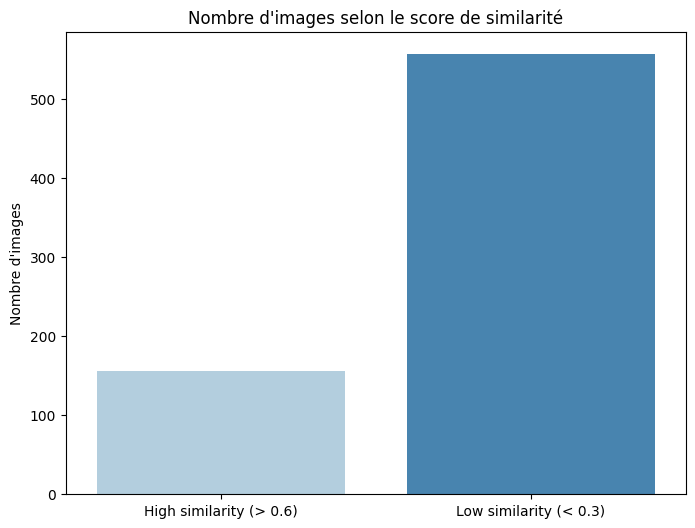

In [9]:
high_score = merged_df[merged_df['similarity_score'] > 0.8]
low_score = merged_df[merged_df['similarity_score'] < 0.3]

score_categories = ['High similarity (> 0.6)', 'Low similarity (< 0.3)']
count_categories = [high_score.shape[0], low_score.shape[0]]

plt.figure(figsize=(8, 6))
sns.barplot(x=score_categories, y=count_categories, palette='Blues')
plt.title("Nombre d'images selon le score de similarité")
plt.ylabel("Nombre d'images")
plt.show()

In [10]:
high_similarity = merged_df[merged_df['similarity_score'] > 0.8]  # Très bon score
moderate_similarity = merged_df[(merged_df['similarity_score'] > 0.5) & (merged_df['similarity_score'] <= 0.8)]  # Bon score
low_similarity = merged_df[merged_df['similarity_score'] <= 0.5]  # Faible score

print(f"Nombre d'annotations très bonnes (score > 0.8): {high_similarity.shape[0]}")
print(f"Nombre d'annotations bonnes (score entre 0.5 et 0.8): {moderate_similarity.shape[0]}")
print(f"Nombre d'annotations faibles (score < 0.5): {low_similarity.shape[0]}")


Nombre d'annotations très bonnes (score > 0.8): 156
Nombre d'annotations bonnes (score entre 0.5 et 0.8): 735
Nombre d'annotations faibles (score < 0.5): 1073


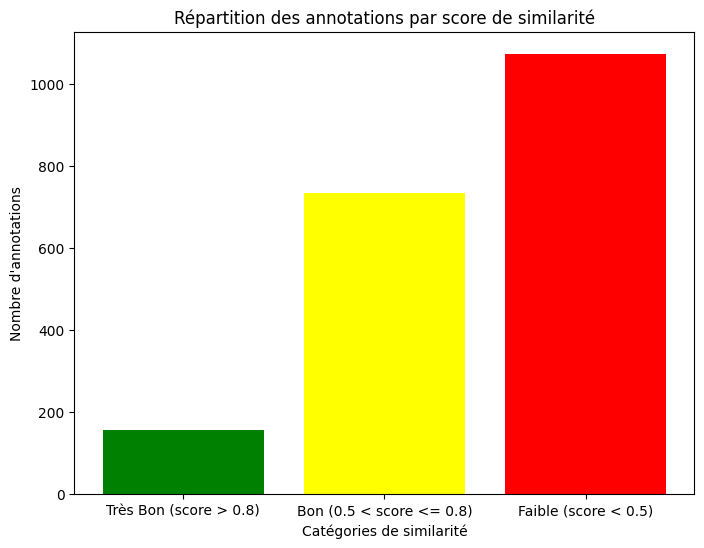

In [11]:
categories = ['Très Bon (score > 0.8)', 'Bon (0.5 < score <= 0.8)', 'Faible (score < 0.5)']
values = [high_similarity.shape[0], moderate_similarity.shape[0], low_similarity.shape[0]]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['green', 'yellow', 'red'])
plt.title("Répartition des annotations par score de similarité")
plt.xlabel("Catégories de similarité")
plt.ylabel("Nombre d'annotations")
plt.show()

In [14]:
# Sauvegarder le fichier final
merged_df.to_csv("/home/pionner01/Automatic-annotation-of-African-images/app/data/resultats_similarite.csv", index=False)
print("✅ Fichier 'resultats_similarite.csv' généré avec succès")

✅ Fichier 'resultats_similarite.csv' généré avec succès
